# Mini Project 1


### Business Problem: Predicting Car Insurance Premiums Based on Driver and Vehicle Characteristics

In the real world, insurance companies use a variety of factors to assess the risk of insuring a driver and their vehicle. These factors help them determine the insurance premium, or the amount the driver must pay annually for car insurance. The goal of this predictive model is to estimate the insurance premium based on several characteristics of both the driver and the car.

### Data Problem:

Build a predictive model that estimates car insurance premiums based on various input features (driver characteristics and vehicle attributes). The goal is to predict the target variable, insurance premium, given the input features, which might include:

Driver Characteristics: Age, Driving experience (years), Gender, Driving history (e.g., number of accidents, claims), Occupation, 

Vehicle Characteristics:Vehicle make and model, Vehicle age, Engine size/type, Safety features (e.g., airbags, anti-lock brakes), Car value or price

### Dataset
This dataset contains two csv files: one is for training; the other is for testing.
It has features such as driver age, driving experience, accident history, annual mileage, and car manufacturing year to predict the insurance premium.

In [4]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt

sns.set_context("poster")
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_style("whitegrid")

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. 

In [7]:
# Read CSV
#train_df = pd.read_csv("C:/Yan/Labs/MiniProject1/car_insurance_premium_dataset.csv")
#test_df = pd.read_csv("C:/Yan/Labs/MiniProject1/car_insurance_premium_dataset_TEST.csv")
#df=pd.concat([train_df, test_df], axis=0, ignore_index=True)

df = pd.read_csv("C:/Yan/Labs/MiniProject1/car_insurance_premium_dataset.csv")


In [8]:
# Check how many rows and columns
df.shape

(1000, 7)

In [9]:
# Check the first 5 rows
df.head()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
0,56,32,4,17,2002,23,488.35
1,46,19,0,21,2025,0,486.15
2,32,11,4,15,2020,5,497.55
3,60,0,4,19,1991,34,498.35
4,25,7,0,13,2005,20,495.55


In [10]:
# Check the last 5 rows
df.tail()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
995,23,5,3,22,2020,5,500.00
996,43,8,3,17,2023,2,494.55
997,21,3,5,19,1998,27,506.05
998,36,18,1,23,2011,14,491.45
999,37,19,2,12,2002,23,492.80


In [11]:
# Check for missing (null) values in dataframe
df.isnull().sum()

Driver Age                   0
Driver Experience            0
Previous Accidents           0
Annual Mileage (x1000 km)    0
Car Manufacturing Year       0
Car Age                      0
Insurance Premium ($)        0
dtype: int64

There is no NULL value in this dataset. Therefore we donot need to remove or add values in this dataset

In [13]:
# Get sumary info of this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Driver Age                 1000 non-null   int64  
 1   Driver Experience          1000 non-null   int64  
 2   Previous Accidents         1000 non-null   int64  
 3   Annual Mileage (x1000 km)  1000 non-null   int64  
 4   Car Manufacturing Year     1000 non-null   int64  
 5   Car Age                    1000 non-null   int64  
 6   Insurance Premium ($)      1000 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 54.8 KB


In [14]:
# Identify duplicate rows in dataframe
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

There is no duplicated rows in this dataset. Therefore we donot need remove any rows.

In [16]:
# Generate descriptive statistics of this dataframe
df.describe()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.575000,14.759000,2.5680,17.933000,2007.637000,17.363000,493.742250
std,13.765677,10.544292,1.6989,4.410665,10.363331,10.363331,5.909689
min,18.000000,0.000000,0.0000,11.000000,1990.000000,0.000000,477.050000
25%,30.000000,6.000000,1.0000,14.000000,1999.000000,8.000000,489.487500
50%,42.000000,13.000000,3.0000,18.000000,2008.000000,17.000000,493.950000
75%,53.000000,23.000000,4.0000,22.000000,2017.000000,26.000000,498.312500
max,65.000000,40.000000,5.0000,25.000000,2025.000000,35.000000,508.150000


In [17]:
# Check if there is any outlier in Driver Age
df[(df['Driver Age'] > 80) | (df['Driver Age'] < 16)]

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)


In [18]:
# Check if there is any outlier in Driver Experience
df[(df['Driver Experience'] > 50) | (df['Driver Experience'] < 0)]

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)


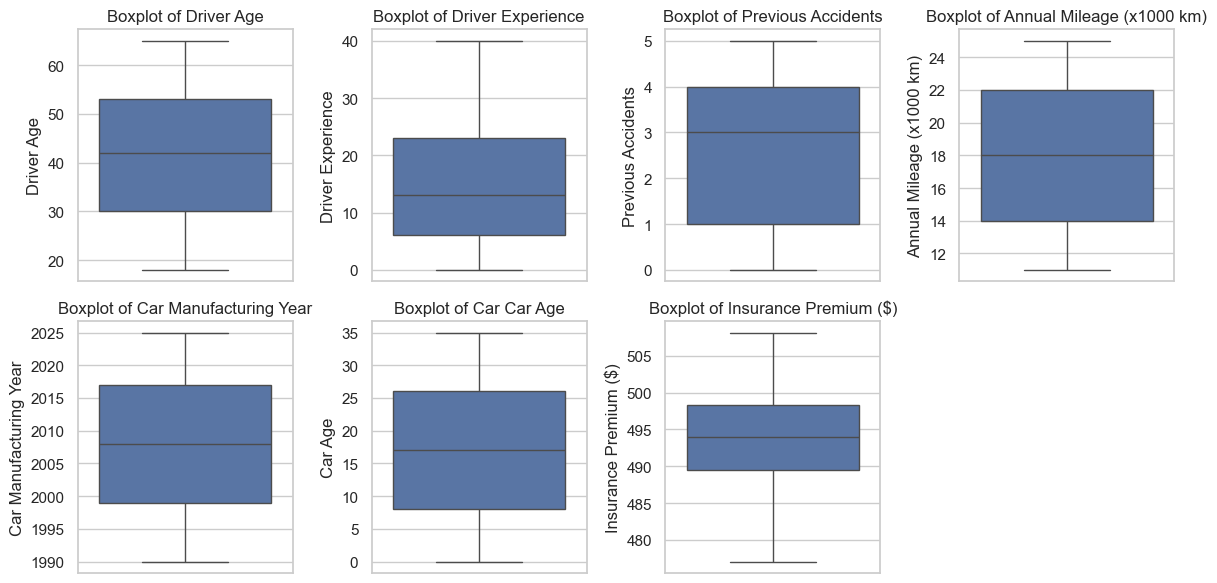

In [19]:
# Create boxplots for each column
plt.figure(figsize=(12, 6))

# Driver Age boxplot
plt.subplot(2, 4, 1)
sns.boxplot(y=df['Driver Age'])
plt.title('Boxplot of Driver Age')

# Driver Experience boxplot
plt.subplot(2, 4, 2)
sns.boxplot(y=df['Driver Experience'])
plt.title('Boxplot of Driver Experience')

# Previous Accidents
plt.subplot(2, 4, 3)
sns.boxplot(y=df['Previous Accidents'])
plt.title('Boxplot of Previous Accidents')

# Annual Mileage (x1000 km)
plt.subplot(2, 4, 4)
sns.boxplot(y=df['Annual Mileage (x1000 km)'])
plt.title('Boxplot of Annual Mileage (x1000 km)')

# Car Manufacturing Year
plt.subplot(2, 4, 5)
sns.boxplot(y=df['Car Manufacturing Year'])
plt.title('Boxplot of Car Manufacturing Year')

# Car Age
plt.subplot(2, 4, 6)
sns.boxplot(y=df['Car Age'])
plt.title('Boxplot of Car Car Age')

# Insurance Premium ($)
plt.subplot(2, 4, 7)
sns.boxplot(y=df['Insurance Premium ($)'])
plt.title('Boxplot of Insurance Premium ($)')

plt.tight_layout()
plt.show()


There is no outlier data in dataset

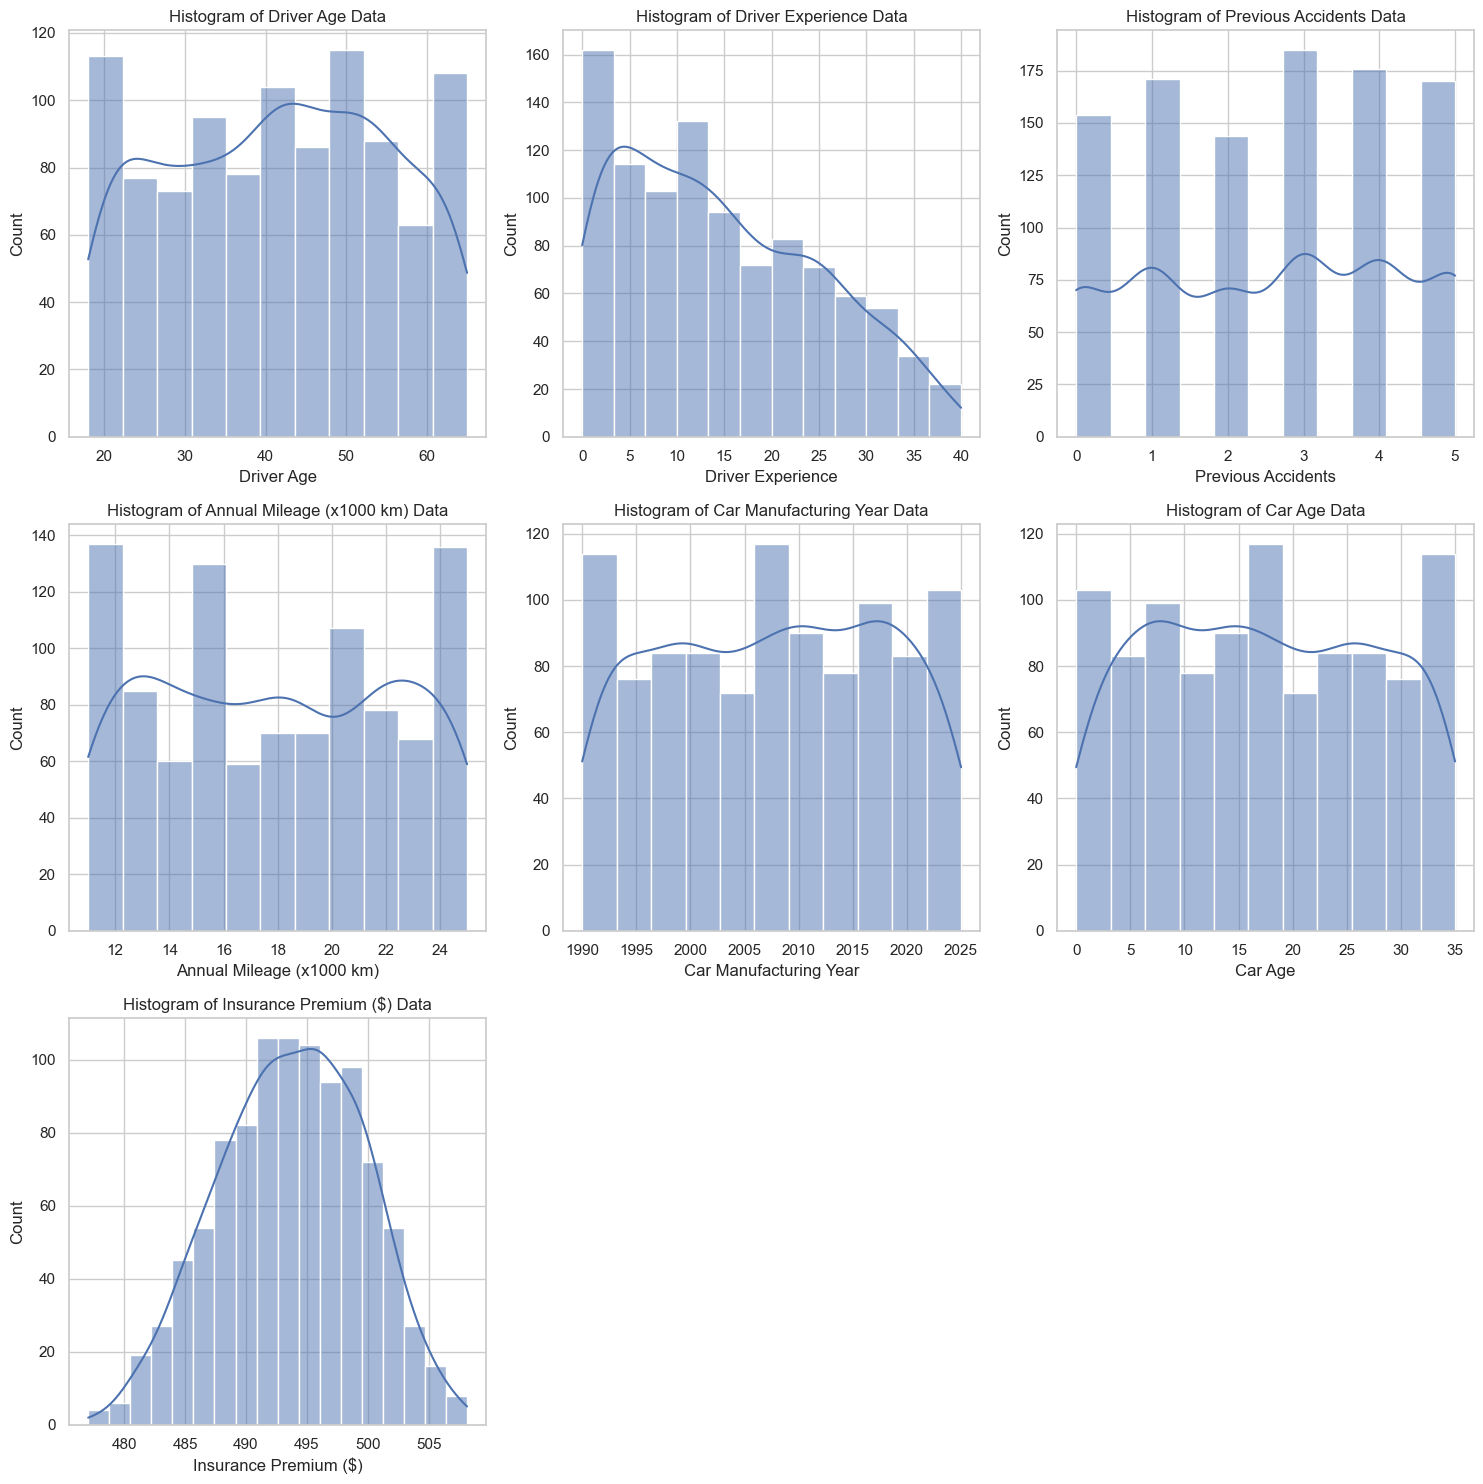

In [21]:
# Create histograms for each column
plt.figure(figsize = (15, 15))
for i, col in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(x = df[col], kde=True)  # Including KDE curve for better visualization
    plt.title(f'Histogram of {col} Data')
    plt.tight_layout()

plt.show()

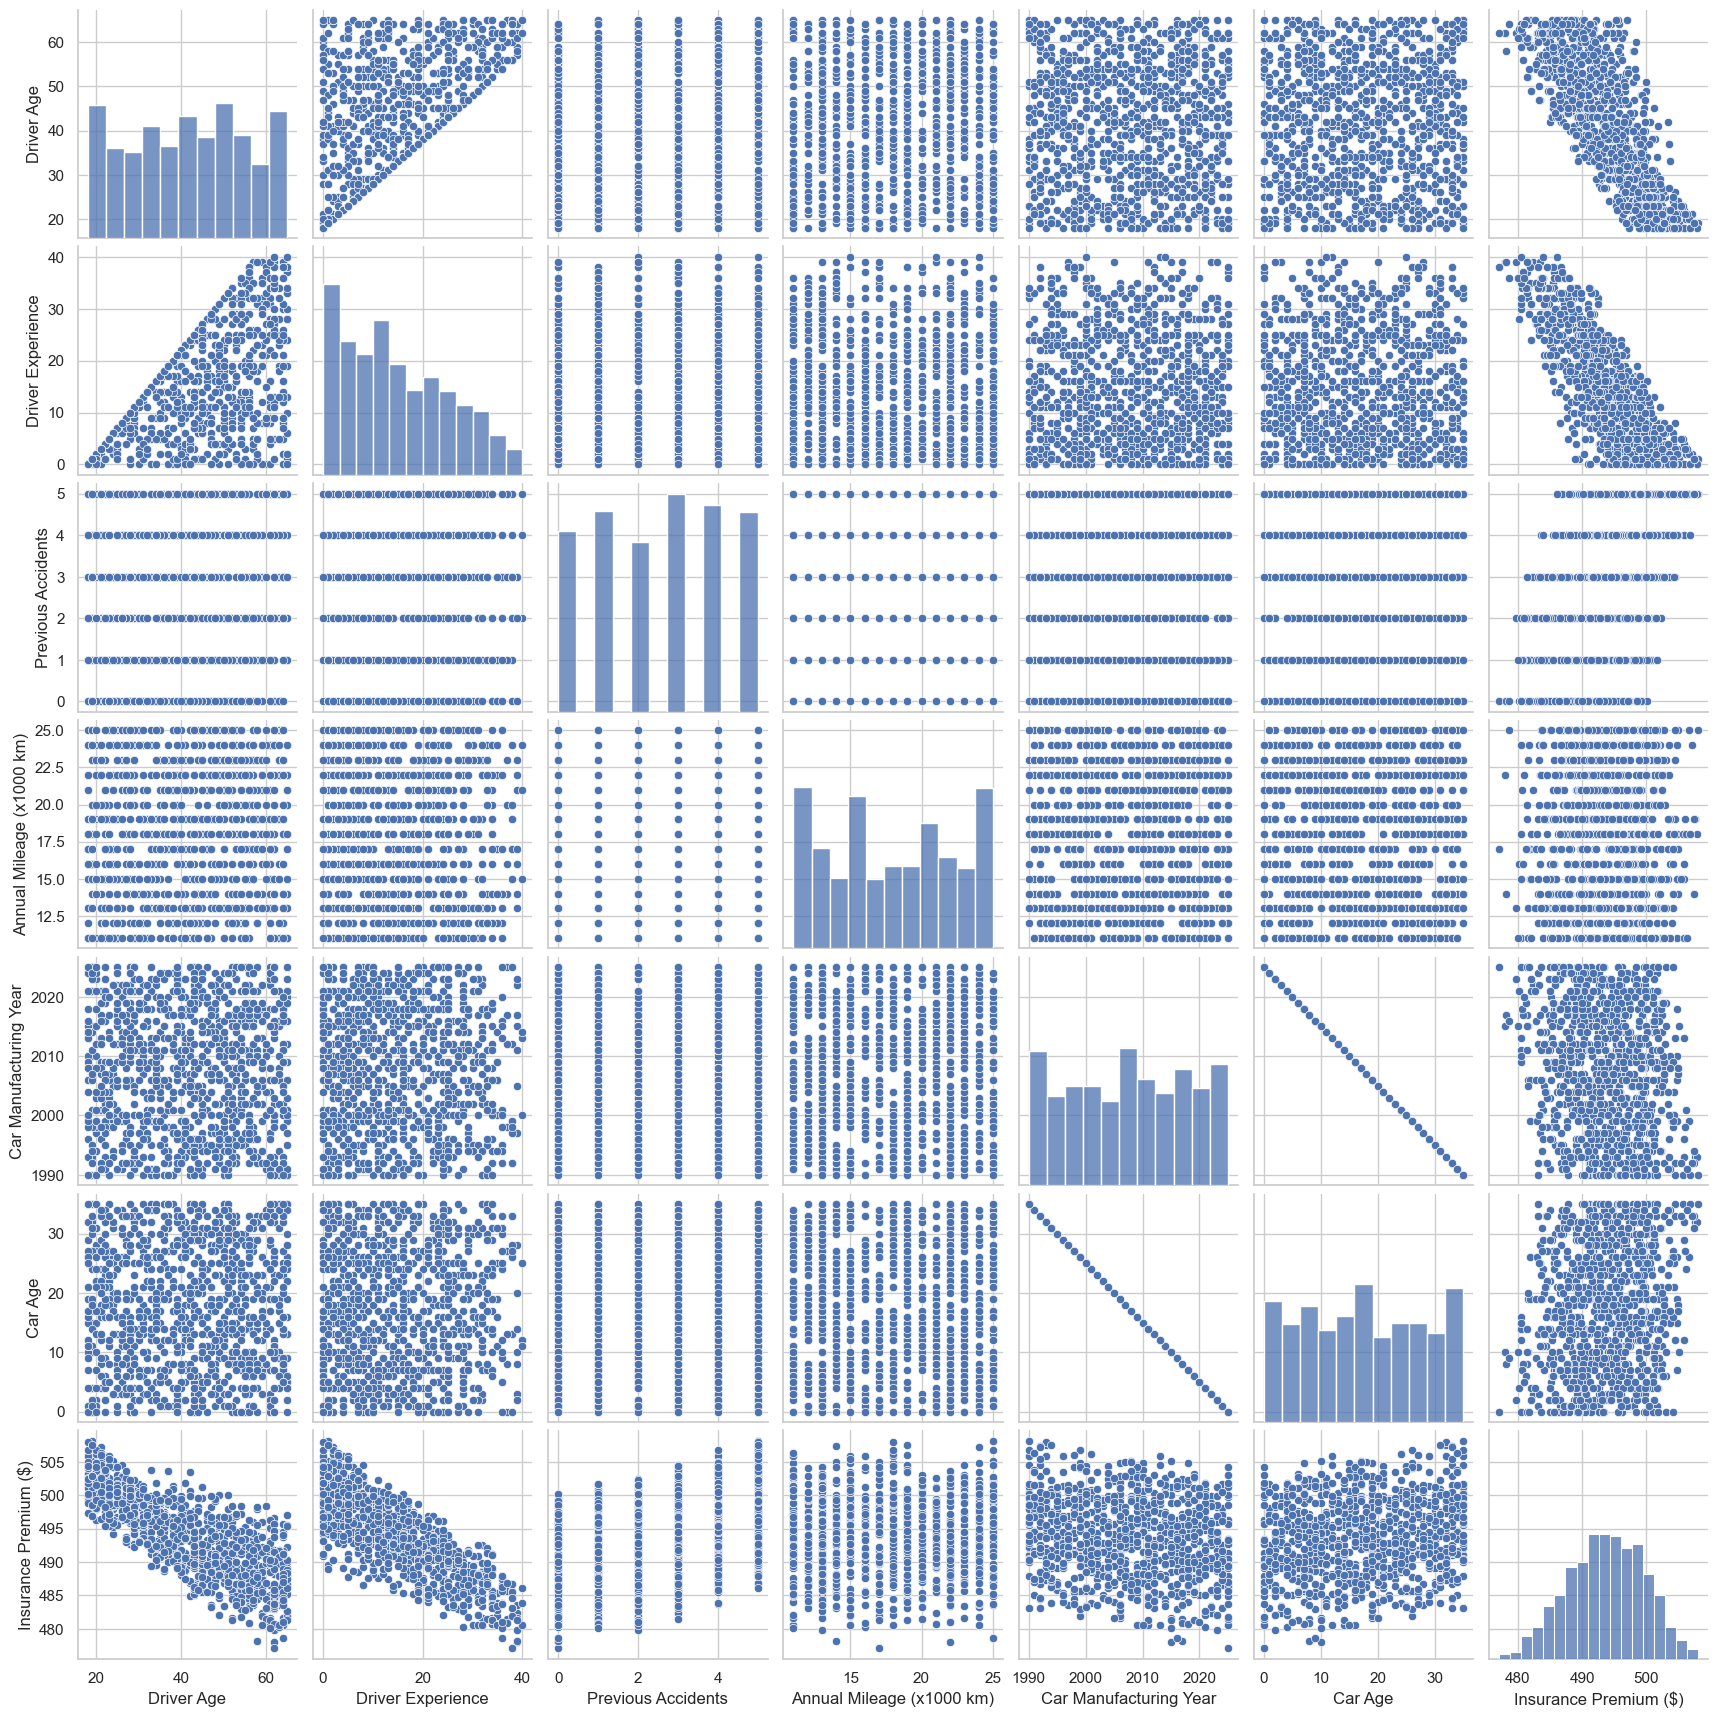

In [22]:
# Creates a pairwise plot matrix for all the numerical columns in this dataframe
sns.pairplot(df)
plt.show()

In [23]:
# Correlation
df_corr = df.corr()
df_corr

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
Driver Age,1.000000,0.607890,0.031819,0.056822,0.008187,-0.008187,-0.776848
Driver Experience,0.607890,1.000000,0.020837,-0.014424,-0.038194,0.038194,-0.803323
Previous Accidents,0.031819,0.020837,1.000000,0.007088,-0.030123,0.030123,0.410786
Annual Mileage (x1000 km),0.056822,-0.014424,0.007088,1.000000,-0.002898,0.002898,0.022131
Car Manufacturing Year,0.008187,-0.038194,-0.030123,-0.002898,1.000000,-1.000000,-0.171829
Car Age,-0.008187,0.038194,0.030123,0.002898,-1.000000,1.000000,0.171829
Insurance Premium ($),-0.776848,-0.803323,0.410786,0.022131,-0.171829,0.171829,1.000000


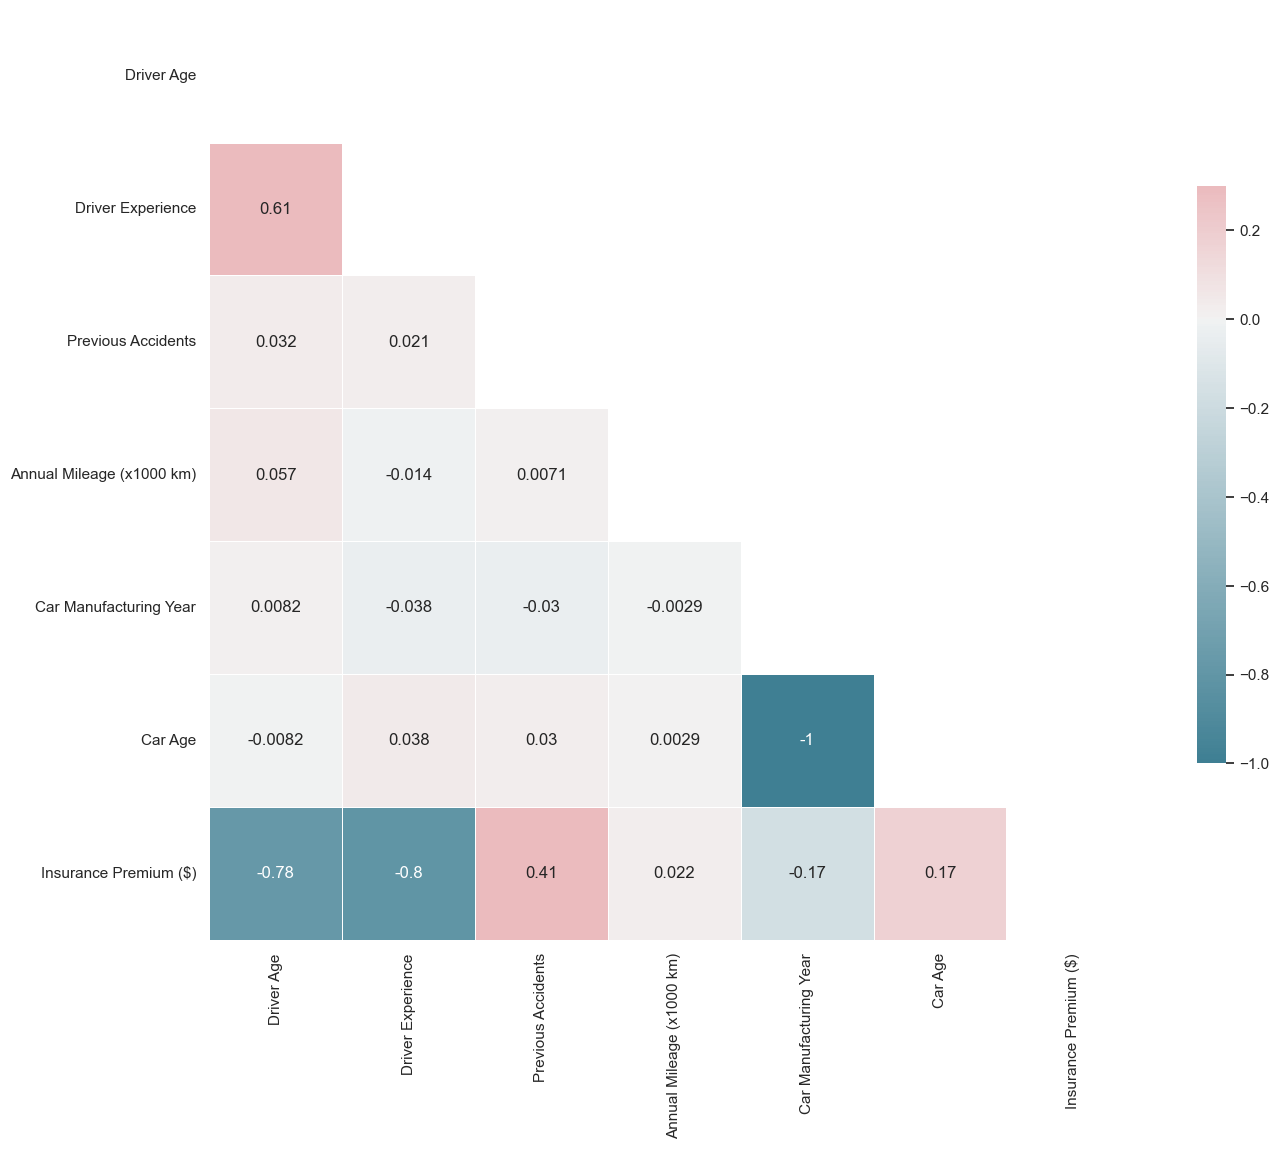

In [24]:
## Draw heatmap

sns.set(style='white')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom deverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidth=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

### 2. Hypotheis Testing

#### 2.1 Define Hypothesis
H0: Driver Experience does not significantly affect car insurance premiums.

H1: Driver Experience significantly affects car insurance premiums..

In [27]:
df_DriverExperience_mean = df['Driver Experience'].mean()
print(df_DriverExperience_mean)

14.759


Draw Scatter Plot of `Driver Age` & `Insurance Premium ($)`

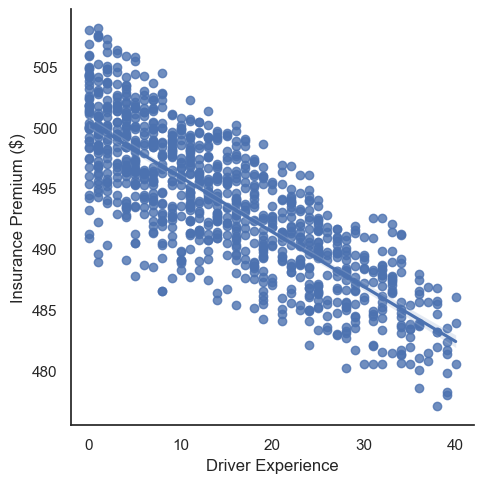

In [29]:
#plt.scatter(RM, MEDV, alpha=0.5, color='green')
sns.lmplot(x='Driver Experience', y='Insurance Premium ($)', data=df)
plt.show()

#### 2.2 Set alpha (Let alpha = 0.05)

In [31]:
alpha = 0.05

#### 2.3 Set Data

Now, let's create two sets of data
- Driver Experience has more than 14 years
- Driver Experience has no more than 14 years

Take sample of 200 rows in each dataset.

In [33]:
N = 200
premium_over_14 = df[df['Driver Experience'] > 14]['Insurance Premium ($)'].sample(N, random_state=10)
premium_under_14 = df[df['Driver Experience'] <= 14]['Insurance Premium ($)'].sample(N, random_state=10)

#### 2.4 Build histogram for both `Driver Experience over 14 years` & `Driver Experience no more than 14 years`

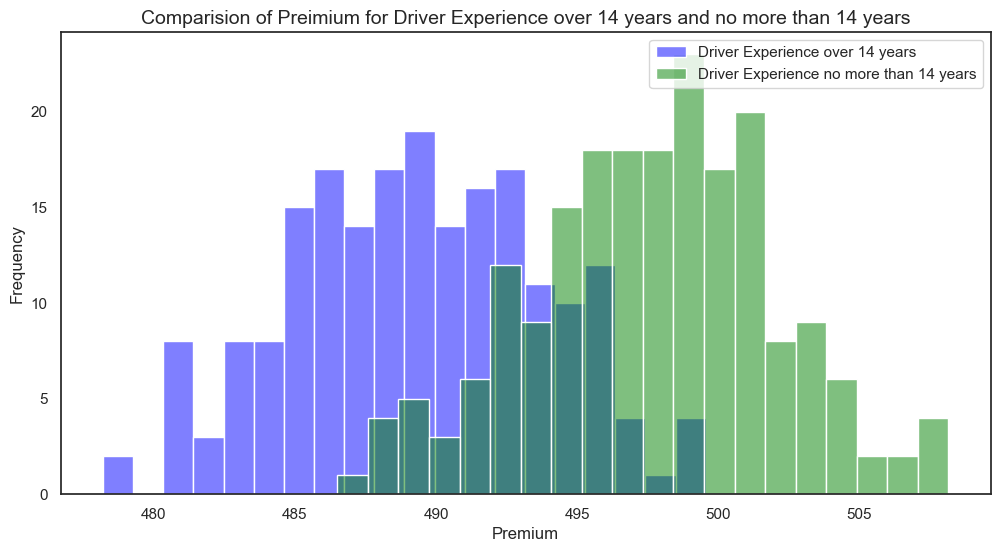

In [35]:
# Create the figure and axis
plt.figure(figsize=(12, 6))

# Plot histogram for old driver (Driver Age > 41)
ax = sns.histplot(premium_over_14, bins=20, color='blue', label='Driver Experience over 14 years', kde=False, alpha=0.5)

# Plot histogram for young driver (Driver Age <= 41) on the same axis
sns.histplot(premium_under_14, ax=ax, bins=20, color='green', label='Driver Experience no more than 14 years', kde=False, alpha=0.5)

# Add title and labels
ax.set_title('Comparision of Preimium for Driver Experience over 14 years and no more than 14 years', fontsize=14)
ax.set_xlabel('Premium', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Add legend
plt.legend(loc='upper right')

# Show the plot
plt.show()

#### 2.5 Function to Test Significance of `p_value`

This funcation takes p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message.

In [37]:
# Null Hypothesis Dictionary
null_hypothesis = {
    'H0': 'Driver Experience does not significantly affect car insurance premiums.'
    , 'H1': 'Driver Experience significantly affects car insurance premiums.'
}

In [38]:
def print_sig(p_value, alpha):
    '''
    Inputs:
    p_value: Calculated p_value
    alpha: Confidence level
    '''
    if p_value < alpha:
        print("We reject our null hypothesis.")
        print(null_hypothesis['H1'])
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
        print(null_hypothesis['H0'])
    else:
        print("Our test is inconclusive.")

#### 2.6 Use `Stats` Package to  Calculate the T-test for the means of two independent samples of scores

In [40]:
t, p = stats.ttest_ind(premium_over_14, premium_under_14)
print("t = " + str(t))
print("p = " + str(p))
print_sig(p, alpha)

t = -18.778445334825797
p = 8.541512483416088e-57
We reject our null hypothesis.
Driver Experience significantly affects car insurance premiums.


### 3. Set Target Variable

Create a target variable for 'Insurance Premium ($)'

In [43]:
# Target Variable
y= df['Insurance Premium ($)']

### 4. Set Predictor Variables

In [45]:
# Check correlation
df.corr()['Insurance Premium ($)'].sort_values()

Driver Experience           -0.803323
Driver Age                  -0.776848
Car Manufacturing Year      -0.171829
Annual Mileage (x1000 km)    0.022131
Car Age                      0.171829
Previous Accidents           0.410786
Insurance Premium ($)        1.000000
Name: Insurance Premium ($), dtype: float64

The correlation between the premium and both driving experience and driver age is strong, suggesting that both factors significantly influence the premium.
However, driver age is correlated with driver experience. Driver experience is chosen as the predictor variable, as it exhibits the highest correlation value with the premium.

In [47]:
predictor_columns = ['Driver Experience']
X = df[predictor_columns]
X.head()

,Driver Experience
0,32
1,19
2,11
3,0
4,7


### 5. Using Linear Regression Create a Model and Test Score

#### 5.1 Create Linear Regression Model

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [51]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [52]:
# Create a model for Linear Regression
lr = LinearRegression()

# Fit the model with the Training data
lr.fit(X_train, y_train)

# Calculate the score (R^2 for Regression) for Training Data
lr.score(X_train, y_train)

0.6419452663102267

In [53]:
# Calculate the score (R^2 for Regression) for Testing Dat
lr.score(X_test, y_test)

0.6566057101056901

In [54]:
# Find coefficients
lr_coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': lr.coef_})
lr_coef_df

,feature,coefficient
0,Driver Experience,-0.44366


In [55]:
lr_intercept_df = lr.intercept_
lr_intercept_df

500.2223760785948

#### 5.2 Cross validation

In [57]:
# Cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import root_mean_squared_error

In [58]:
# Set up 5-fold cross validation
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):

    # Get training and test sets for X and y
    X_train = X.iloc[train,]
    y_train = y.iloc[train,]
    X_test = X.iloc[test,]
    y_test = y.iloc[test,]

    # Fit model with training set
    lr.fit(X_train, y_train)

    # Make predictions with training and test set
    train_preds = lr.predict(X_train)
    test_preds = lr.predict(X_test)

    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(lr.score(X_train, y_train))
    test_scores.append(lr.score(X_test, y_test))

    train_rmse.append(root_mean_squared_error(y_train, train_preds))
    test_rmse.append(root_mean_squared_error(y_test, test_preds))

# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({'Training R2': train_scores, 'Test R2': test_scores, 'Training RMSE': train_rmse, 'Test RMSE': test_rmse}, index=[i+1 for i in range(5)])

metrics_df

,Training R2,Test R2,Training RMSE,Test RMSE
1,0.645128,0.635004,3.481575,3.661002
2,0.648827,0.627945,3.519102,3.515527
3,0.650441,0.618549,3.564983,3.324314
4,0.643083,0.652798,3.536467,3.442467
5,0.638433,0.667528,3.483103,3.657269


In [59]:
# Describe the metrics
metrics_df.describe()

,Training R2,Test R2,Training RMSE,Test RMSE
count,5.000000,5.000000,5.000000,5.000000
mean,0.645182,0.640365,3.517046,3.520116
std,0.004767,0.019693,0.035671,0.144091
min,0.638433,0.618549,3.481575,3.324314
25%,0.643083,0.627945,3.483103,3.442467
50%,0.645128,0.635004,3.519102,3.515527
75%,0.648827,0.652798,3.536467,3.657269
max,0.650441,0.667528,3.564983,3.661002


1. R² (R-squared):
Training R² measures how well the model fits the training data. Higher R² values mean the model is better at explaining the variance in the training set.

Test R² measures how well the model generalizes to unseen data (test set). A higher test R² indicates that the model is making good predictions on the test data.

Interpretation:
On average, the training R² is around 0.65, which indicates that the model explains about 65% of the variance in the training set.

The test R² varies between 0.61 and 0.69, with an average of around 0.64. This shows that the model is able to generalize moderately well to unseen data, but there’s room for improvement.

2. RMSE (Root Mean Squared Error):
Training RMSE measures the average distance between the predicted and actual values in the training set. A lower value is better, as it means the model is making more accurate predictions on the training data.

Test RMSE measures the same but on the unseen test data.

Interpretation:
The training RMSE ranges from 3.48 to 3.57 and is relatively consistent across folds. This suggests that the model's performance on the training data is stable.

The test RMSE ranges from 3.34 to 3.65 and is somewhat higher than the training RMSE, which is common in machine learning. The fact that the test RMSE is slightly higher suggests that the model is overfitting a little bit (i.e., it’s slightly better at predicting on the training data than on new, unseen data).

Key Insights:
Generalization: The model's test R² is somewhat lower than the training R², suggesting there is some overfitting. This is a common pattern, where the model fits the training data well but struggles to generalize on the test data.

Model Performance:

The model's performance is fairly consistent across folds, with only slight variations in both R² and RMSE.

The test RMSE values are relatively close to each other, with an average around 3.52, indicating that the model’s error is reasonably stable across different subsets of the data.

The R² values suggest that while the model is able to explain a good portion of the variance in the data, it’s not perfect. There’s still significant room for improvement in capturing the relationship between Driver Experience and Premium.


#### 5.3 Load and check test data

In [62]:
df_test = pd.read_csv("C:/Yan/Labs/MiniProject1/car_insurance_premium_dataset_TEST.csv")

In [63]:
df_test.shape

(100, 7)

In [64]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Driver Age                 100 non-null    int64  
 1   Driver Experience          100 non-null    int64  
 2   Previous Accidents         100 non-null    int64  
 3   Annual Mileage (x1000 km)  100 non-null    int64  
 4   Car Manufacturing Year     100 non-null    int64  
 5   Car Age                    100 non-null    int64  
 6   Insurance Premium ($)      100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 5.6 KB


In [65]:
df_test.head()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
0,56,7,0,22,2009,16,489.40
1,46,23,2,21,1990,35,491.45
2,32,10,5,13,1997,28,501.55
3,60,16,1,16,2005,20,487.50
4,25,7,4,17,2003,22,501.95


In [66]:
df_test.isnull().sum()

Driver Age                   0
Driver Experience            0
Previous Accidents           0
Annual Mileage (x1000 km)    0
Car Manufacturing Year       0
Car Age                      0
Insurance Premium ($)        0
dtype: int64

In [67]:
df_test.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [68]:
# Check if there is any outlier in Driver Age
df_test[(df_test['Driver Age'] > 80) | (df_test['Driver Age'] < 16)]

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)


In [69]:
# Check if there is any outlier in Driver Experience
df_test[(df_test['Driver Experience'] > 50) | (df_test['Driver Experience'] < 0)]

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)


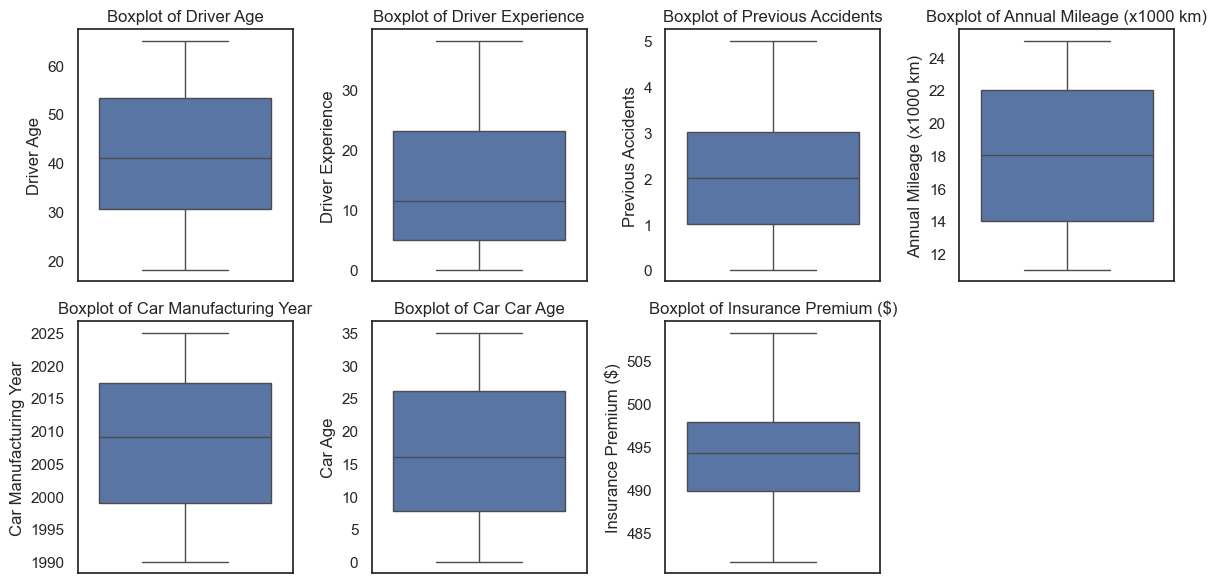

In [70]:
# Create boxplots for each column
plt.figure(figsize=(12, 6))

# Driver Age boxplot
plt.subplot(2, 4, 1)
sns.boxplot(y=df_test['Driver Age'])
plt.title('Boxplot of Driver Age')

# Driver Experience boxplot
plt.subplot(2, 4, 2)
sns.boxplot(y=df_test['Driver Experience'])
plt.title('Boxplot of Driver Experience')

# Previous Accidents
plt.subplot(2, 4, 3)
sns.boxplot(y=df_test['Previous Accidents'])
plt.title('Boxplot of Previous Accidents')

# Annual Mileage (x1000 km)
plt.subplot(2, 4, 4)
sns.boxplot(y=df_test['Annual Mileage (x1000 km)'])
plt.title('Boxplot of Annual Mileage (x1000 km)')

# Car Manufacturing Year
plt.subplot(2, 4, 5)
sns.boxplot(y=df_test['Car Manufacturing Year'])
plt.title('Boxplot of Car Manufacturing Year')

# Car Age
plt.subplot(2, 4, 6)
sns.boxplot(y=df_test['Car Age'])
plt.title('Boxplot of Car Car Age')

# Insurance Premium ($)
plt.subplot(2, 4, 7)
sns.boxplot(y=df_test['Insurance Premium ($)'])
plt.title('Boxplot of Insurance Premium ($)')

plt.tight_layout()
plt.show()


There is no outlier data in test dataset

#### 5.4 Actual vs Predicted Insurance Premium

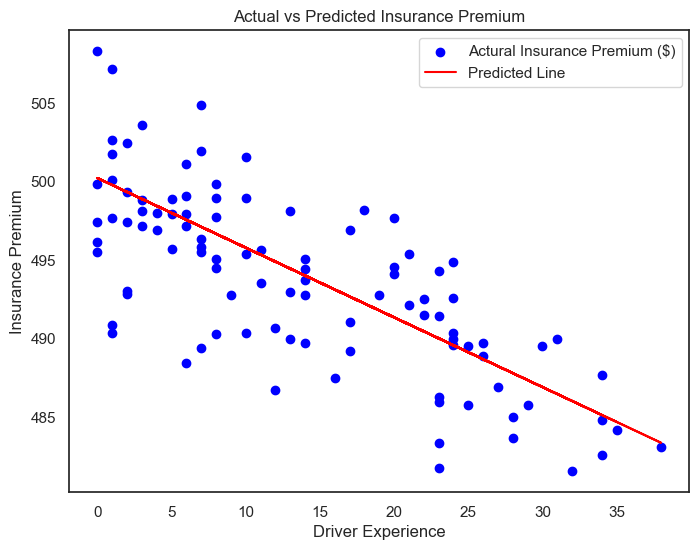

In [73]:
# Get test data (Driver Experience values from df_test)
#X_test = df_test['Driver Experience'].values
X_test = df_test['Driver Experience']

# Extract the coefficient for 'Driver Experience'
coef_value = lr_coef_df.loc[lr_coef_df['feature'] == 'Driver Experience', 'coefficient'].iloc[0]

# Calculate the predicted y-values
y_pred = lr_intercept_df + coef_value * X_test

# Plotting the actual values vs. predicted line
plt.figure(figsize=(8, 6))

# Plot the actual data (scatter plot)
plt.scatter(X_test, df_test['Insurance Premium ($)'], color='blue', label='Actural Insurance Premium ($)')

# Plot the predicted values (linear regression line)
plt.plot(X_test, y_pred, color='red', label='Predicted Line')

# Labels and title
plt.xlabel('Driver Experience')
plt.ylabel('Insurance Premium')
plt.title('Actual vs Predicted Insurance Premium')

# Show legend
plt.legend()

# Show the plot
plt.show()
